# Detección de Digitos

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

Para poder visualizar de manera práctica y sencilla los digitos en el dataset, se crea una función que toma cada registro y graficamos en una escala de grises de 16 niveles.

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
    plt.show()

La función `plot_digits` es utilizada para visualizar los datos de los digitos cargados.

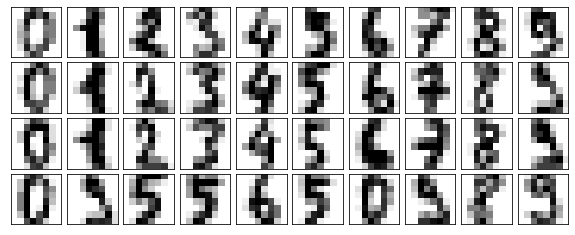

In [ ]:
plot_digits(digits.data)

## Selección de características
Aplicando PCA, se extraen los dos componentes más importantes.

In [ ]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Y con estos dos nuevas características se grafican los datos etiquetandolos de acuerdo a la categoría a la que pertenecen.

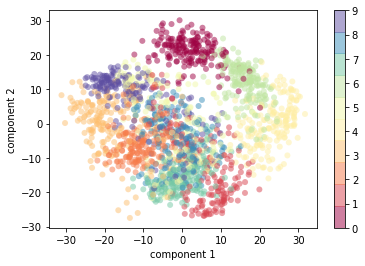

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

La selección apropiada del número de componentes  puede hacerse a través de la visualización de la dependencia de la varianza explicada acumulada con número de componentes. Basados en esta gráfica, se puede determinar el porcentaje de varianza explicada que se desea tener y así determinar el número apropiado de características.

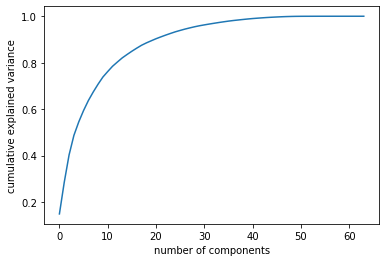

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Una de las aplicaciones alternativas del PCA es en el proceso de eliminación de ruido. Para ejemplicar este proceso, agregamos artificialmente ruido a los datos de digitos originales. El dataset original y el dataset con ruido se presentan a continuación.

Original: 


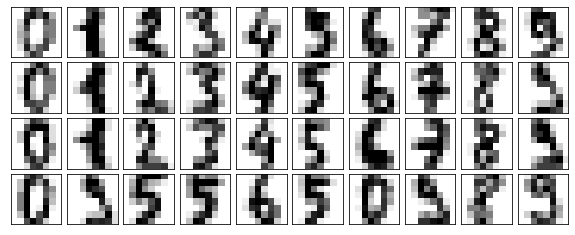

Ruido: 


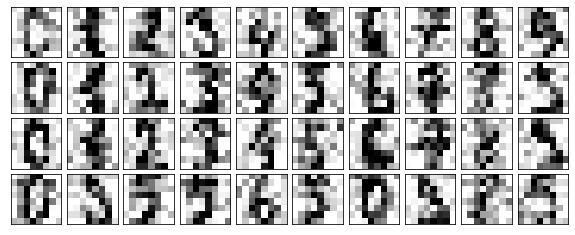

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
print("Original: ")
plot_digits(digits.data)

print("Ruido: ")
plot_digits(noisy)

Para el proceso de filtrado, se crea un PCA con una cantidad de componentes tal que se cubra al menos el 50% de varianza explicada.

In [ ]:
pca = PCA(0.50)
pca.fit(noisy)
pca.n_components_

12

Con estos componentes seleccionados, se transforman los datos con ruido y posteriormente se revierte la transformación. El efecto de este proceso es que se mantiene la información relevante de los datos descartando el ruido.

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)

Ruido: 


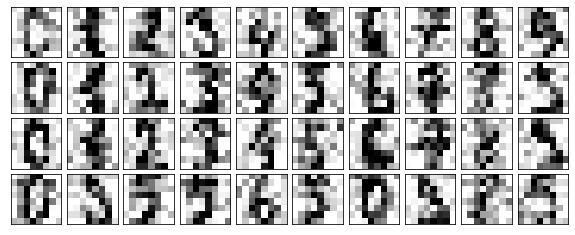

Filtrado: 


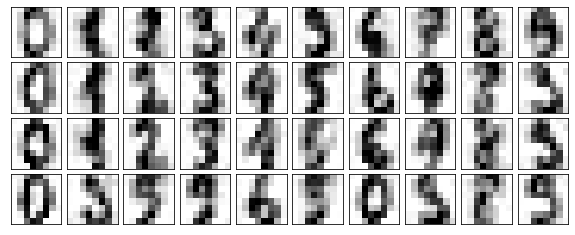

In [ ]:
print("Ruido: ")
plot_digits(noisy)
print("Filtrado: ")
plot_digits(filtered)